# Ensemble(Boosting : Adaboost, GBM, XGBoost) 실습

## Adaboost

반복적으로 진행되고 있듯이, 데이터를 입력하여 데이터 분할부터 진행한다. 이번에는 다른 데이터인 보스턴 집값 예측 데이터를 입력해보자.

In [1]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

In [2]:
boston = datasets.load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
print(boston.data.shape)

(506, 13)


In [4]:
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

adaboost는 기본적으로 base model을 decision tree를 활용하며, 주요 파라미터를 estimator 수와 learning rate를 조절한다.

In [5]:
ada = AdaBoostRegressor(n_estimators=10,learning_rate=0.1)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

In [6]:
mse= metrics.mean_squared_error(y_test, y_pred)
print("RMSE:",np.sqrt(mse))

RMSE: 3.611100952407498


각 모델의 error를 출력해볼 수 있다.현재 estimator를 10개로 설정하였기 때문에, error는 총 10개가 나올것이다.

In [7]:
print((ada.estimator_errors_))

[0.17005011 0.11661985 0.13934122 0.17760754 0.18379098 0.12445223
 0.11927119 0.21142495 0.11797776 0.12745029]


In [8]:
print(np.mean(ada.estimator_errors_))

0.14879861266027988


기본 디폴트 base model 이외의 다른 base model을 사용해보자. SVC를 base model로 사용하여 성능을 확인해보자.

In [9]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')

In [10]:
ada_svr =AdaBoostRegressor(n_estimators=10,  base_estimator=svr, learning_rate=0.1)
ada_svr.fit(X_train, y_train)
y_pred = ada_svr.predict(X_test)

In [11]:
mse= metrics.mean_squared_error(y_test, y_pred)
print("RMSE:",np.sqrt(mse))

RMSE: 4.705930792011302


## GBM

GBM은 마찬가지로 scikit-learn의 ensemble 안에 함수가 구현되어있다. 위에서 사용했던 데이터에 대해 그대로 적용해본다.

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

In [13]:
GBM_reg = GradientBoostingRegressor(n_estimators=10, learning_rate=0.1, max_depth=2)
GBM_reg.fit(X_train, y_train)
y_pred = GBM_reg.predict(X_test)

In [14]:
mse= metrics.mean_squared_error(y_test, y_pred)
print("RMSE:",np.sqrt(mse))

RMSE: 5.583169774753842


estimator의 수에 따른 RMSE의 변화를 한번 살펴보자

In [15]:
est_list = [10,20,30,40,50]
for n_estimator in est_list:
    GBM_reg = GradientBoostingRegressor(n_estimators=n_estimator, learning_rate=0.1, max_depth=2)
    GBM_reg.fit(X_train, y_train)
    y_pred = GBM_reg.predict(X_test)
    mse= metrics.mean_squared_error(y_test, y_pred)
    print("RMSE:",np.sqrt(mse))
    print("========================")

RMSE: 5.583169774753843
RMSE: 4.381869669699579
RMSE: 3.8658975113320864
RMSE: 3.6806935155105727
RMSE: 3.6133863414085554


estimator의 수가 증가함에 따라 테스트 성능인 RMSE가 낮아짐을 확인 할 수 있다.

GBM 또한 다른 Tree 계열들처럼 변수별 가중치와 중요도를 확인 할 수 있다. 이를 차트로 표현해보면 다음과 같다.

Text(0, 0.5, 'Feature Importance Score')

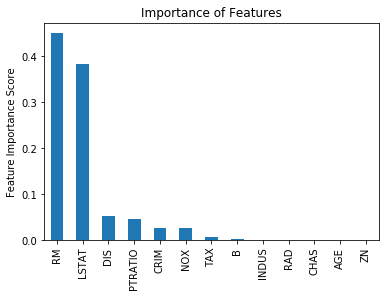

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
feat_imp = pd.Series(GBM_reg.feature_importances_, boston.feature_names).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

## XGBoost

XGBoost를 사용하기 위해서는 기존의 scikit-learn에서는 포함되어있지 않다. 따로 python 패키지로 구성되어있으므로 설치를 진행해야 한다.
- pip3 install xgboost
- pip install xgboost

위와 같이 설치를 한 후 import를 한다. 위에서 그대로 해온것처럼 그대로 진행한다.

In [18]:
import xgboost as xgb

In [19]:
xg_reg = xgb.XGBRegressor(learning_rate = 0.1,max_depth = 2, n_estimators = 10)

비록 scikit-learn 패키지 안에 xgboost가 있지 않지만 사용하는 방식은 매우 흡사하다. 

학습하고자 할때는 fit 함수를, 예측값을 얻고자 할때는 predict함수를 그대로 사용하면된다.

In [20]:
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)

[15:42:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [21]:
mse= metrics.mean_squared_error(y_test, y_pred)
print("RMSE:",np.sqrt(mse))

RMSE: 9.404072103027678


결과를 보면, 아쉽게도 성능이 위에서 진행한 boosting 알고리즘에 비해 좋지 못한것을 볼 수 있다. XGBoost의 경우 파라미터 튜닝이 매우 중요한 요소인 알고리즘이다. 파라미터 튜닝의 경우는 다음에 따로 다루기로 한다.

XGboost도 마찬가지로 feature importance를 확인할 수 있다.

Text(0, 0.5, 'Feature Importance Score')

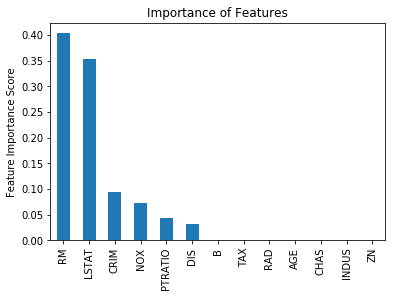

In [22]:
feat_imp = pd.Series(xg_reg.feature_importances_, boston.feature_names).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

위의 GBM과는 학습이 다르게 되었음을 feature importance를 확인함으로써 알수있다.